# 911 Calls Project


* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [ ]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Connect google colab with google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** Read in the csv file as a dataframe called df_911
 **

In [ ]:
df_911 = pd.read_csv('/content/drive/My Drive/Projects_shai/Projects data/911 Calls.csv')  # From My Drive

** Check the info() of the df_911 **

In [ ]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


** Check the head of df **

In [ ]:
df_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [ ]:
df_911['zip'].value_counts().head(5)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


** What are the top 5 townships (twp) for 911 calls? **

In [ ]:
df_911['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


** Take a look at the 'title' column, how many unique title codes are there? **

In [ ]:
df_911.title.nunique()

148

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [ ]:
df_911['Reason'] = df_911['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [ ]:
df_911['Reason'].value_counts()

,count
Reason,
EMS,332692
Traffic,230208
Fire,100622


** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='Reason', ylabel='count'>

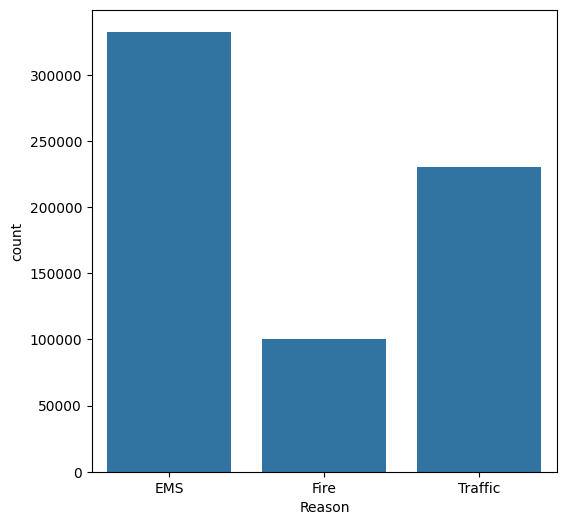

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Reason',data=df_911)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
df_911['timeStamp'].dtype

dtype('O')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [ ]:
df_911['timeStamp'] = pd.to_datetime(df_911['timeStamp'])

In [ ]:
df_911['timeStamp'].dtype

dtype('<M8[ns]')

** Create columns Hour, AM/PM, Minute, Second, Month, Day, Year, Day of Week.**

In [ ]:
df_911['Hour'] = df_911['timeStamp'].apply(lambda time: time.hour)              # Hour
df_911['AM/PM'] = df_911['timeStamp'].apply(lambda time: time.strftime('%p'))   # AM/PM
df_911['Minute'] = df_911['timeStamp'].apply(lambda time: time.minute)          # Minute
df_911['Second'] = df_911['timeStamp'].apply(lambda time: time.second)          # Second
df_911['Month'] = df_911['timeStamp'].apply(lambda time: time.month)            # Month
df_911['Day'] = df_911['timeStamp'].apply(lambda time: time.day)                # Day
df_911['Year'] = df_911['timeStamp'].apply(lambda time: time.year)              # Year
df_911['Day of Week'] = df_911['timeStamp'].apply(lambda time: time.dayofweek)  # Day of week


In [ ]:
df_911.sort_values('timeStamp')
df_911[['Day', 'Month','Year' ,'Hour','Minute','Second','AM/PM','Day of Week']]

,Day,Month,Year,Hour,Minute,Second,AM/PM,Day of Week
0,10,12,2015,17,10,52,PM,3
1,10,12,2015,17,29,21,PM,3
2,10,12,2015,14,39,21,PM,3
3,10,12,2015,16,47,36,PM,3
4,10,12,2015,16,56,52,PM,3
...,...,...,...,...,...,...,...,...
663517,29,7,2020,15,46,51,PM,2
663518,29,7,2020,15,52,19,PM,2
663519,29,7,2020,15,52,52,PM,2
663520,29,7,2020,15,54,8,PM,2


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [ ]:
df_911['Day of Week'] = df_911['Day of Week'].map(day_map)  # Map the names of the days to their numerical representation using the day_map dictionary

In [ ]:
df_911['Day of Week'].head()

,Day of Week
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<Axes: xlabel='Day of Week', ylabel='count'>

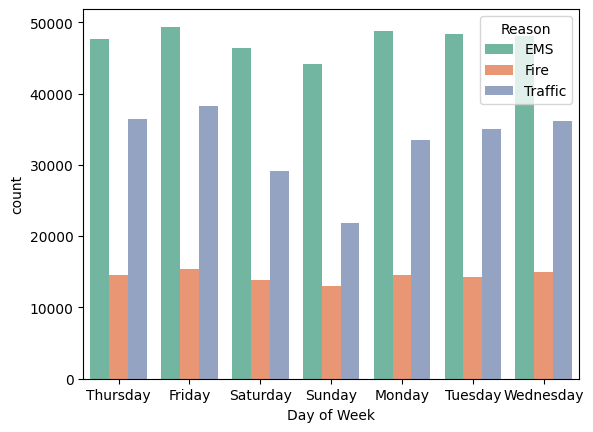

In [ ]:
sns.countplot(x='Day of Week',data=df_911,hue='Reason',palette='Set2')

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

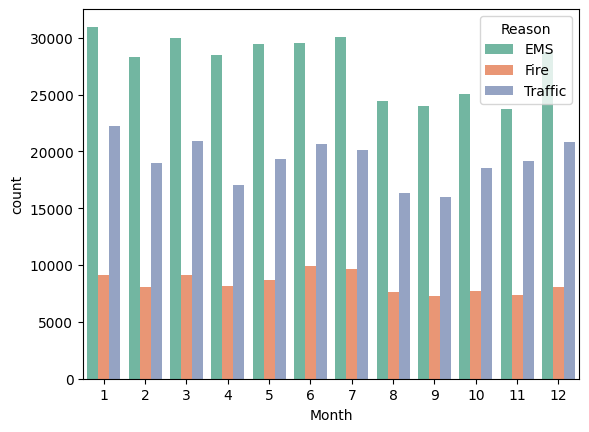

In [ ]:
sns.countplot(x='Month',data=df_911,hue='Reason',palette='Set2')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [ ]:
byMonth = df_911.groupby('Month')['desc'].count().reset_index(name = 'Number of calls')  # Group the DataFrame by 'Month' and count the number of occurrences in the 'desc' column, resetting the index and naming the new column 'number of calls'

byMonth

,Month,Number of calls
0,1,62336
1,2,55427
2,3,60027
3,4,53671
4,5,57509
5,6,60034
6,7,59832
7,8,48359
8,9,47213
9,10,51240


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month', ylabel='Number of calls'>

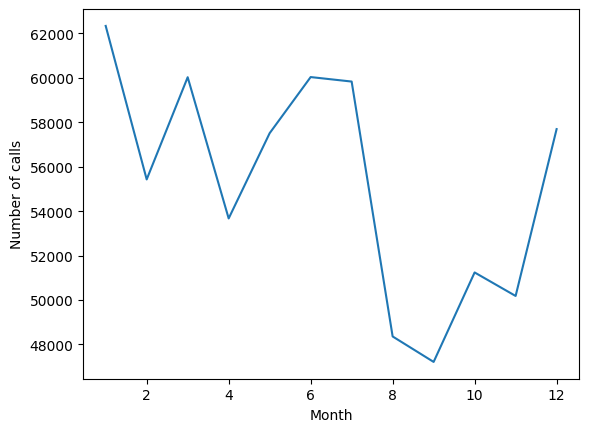

In [ ]:
sns.lineplot(x='Month',y='Number of calls',data=byMonth)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

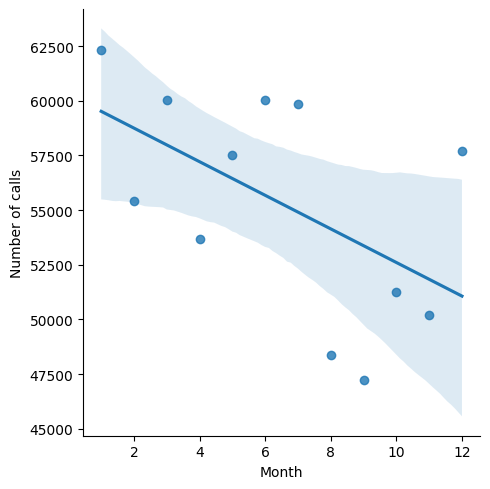

In [ ]:
sns.lmplot(x='Month', y='Number of calls', data=byMonth)  # Points show calls per month, line shows linear trend.

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. **

In [ ]:
df_911['Date']=df_911['timeStamp'].apply(lambda time: time.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
df_911.groupby('Date').count().reset_index()
df_911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,AM/PM,Minute,Second,Month,Day,Year,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,PM,10,52,12,10,2015,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,PM,29,21,12,10,2015,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,PM,39,21,12,10,2015,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,PM,47,36,12,10,2015,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,PM,56,52,12,10,2015,Thursday,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,PM,46,51,7,29,2020,Wednesday,2020-07-29
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,PM,52,19,7,29,2020,Wednesday,2020-07-29
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,PM,52,52,7,29,2020,Wednesday,2020-07-29
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,PM,54,8,7,29,2020,Wednesday,2020-07-29


<Axes: xlabel='Date'>

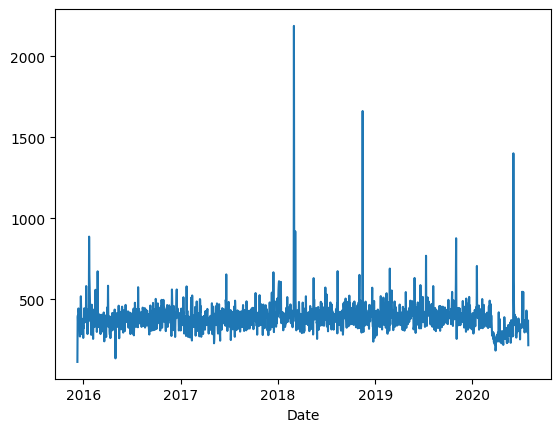

In [ ]:
df_911.groupby('Date').count()['desc'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

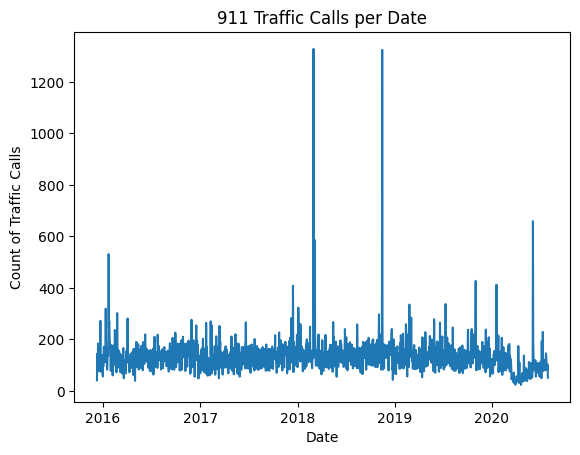

In [ ]:
df_911[df_911['Reason']=='Traffic'].groupby('Date').count()['desc'].plot()

plt.title('911 Traffic Calls per Date')
plt.xlabel('Date')
plt.ylabel('Count of Traffic Calls')

plt.show()

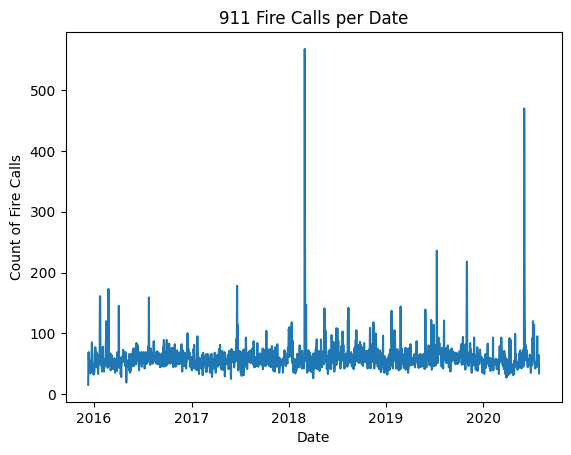

In [ ]:
df_911[df_911['Reason']=='Fire'].groupby('Date').count()['desc'].plot()

plt.title('911 Fire Calls per Date')
plt.xlabel('Date')
plt.ylabel('Count of Fire Calls')

plt.show()

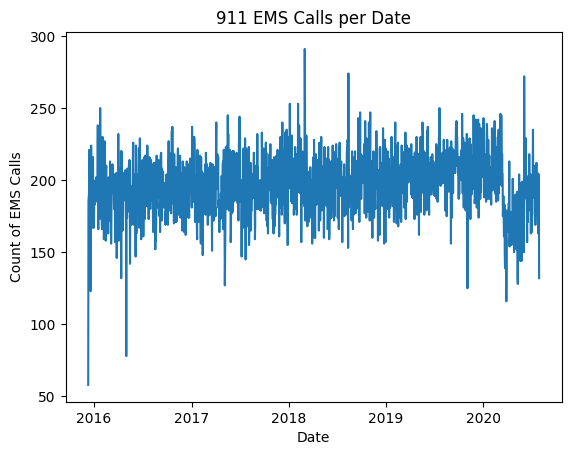

In [ ]:
df_911[df_911['Reason']=='EMS'].groupby('Date').count()['desc'].plot()

plt.title('911 EMS Calls per Date')
plt.xlabel('Date')
plt.ylabel('Count of EMS Calls')

plt.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
heat_data_hour = df_911.groupby(['Day of Week','Hour']).count()['desc'].unstack()
heat_data_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

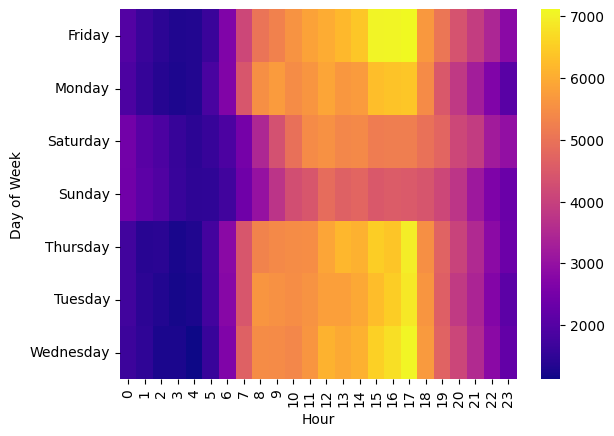

In [ ]:
sns.heatmap(heat_data_hour,cmap='plasma')

** Now create a clustermap using this DataFrame. **

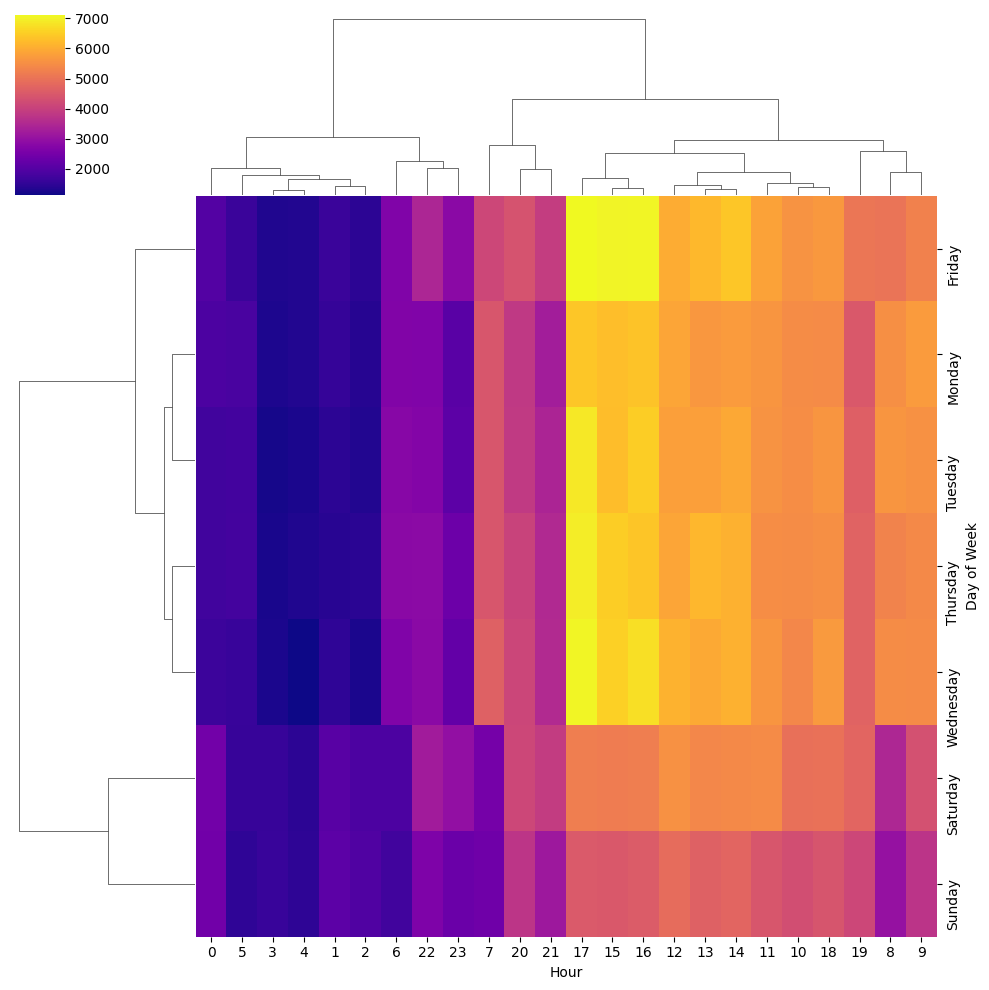

In [ ]:
sns.clustermap(heat_data_hour, cmap='plasma')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
heat_data_month = df_911.groupby(['Day of Week','Month']).count()['desc'].unstack()
heat_data_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<Axes: xlabel='Month', ylabel='Day of Week'>

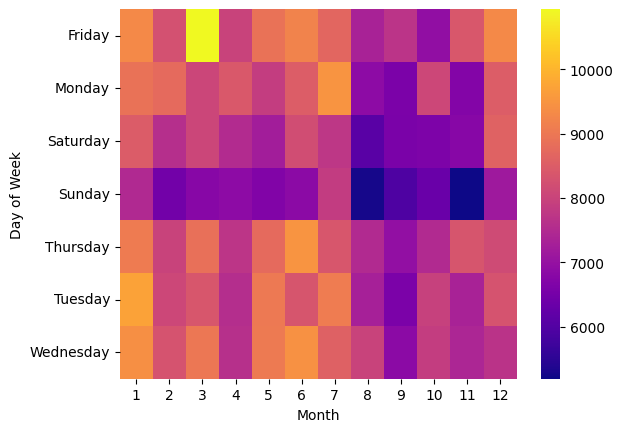

In [ ]:
sns.heatmap(heat_data_month,cmap='plasma')

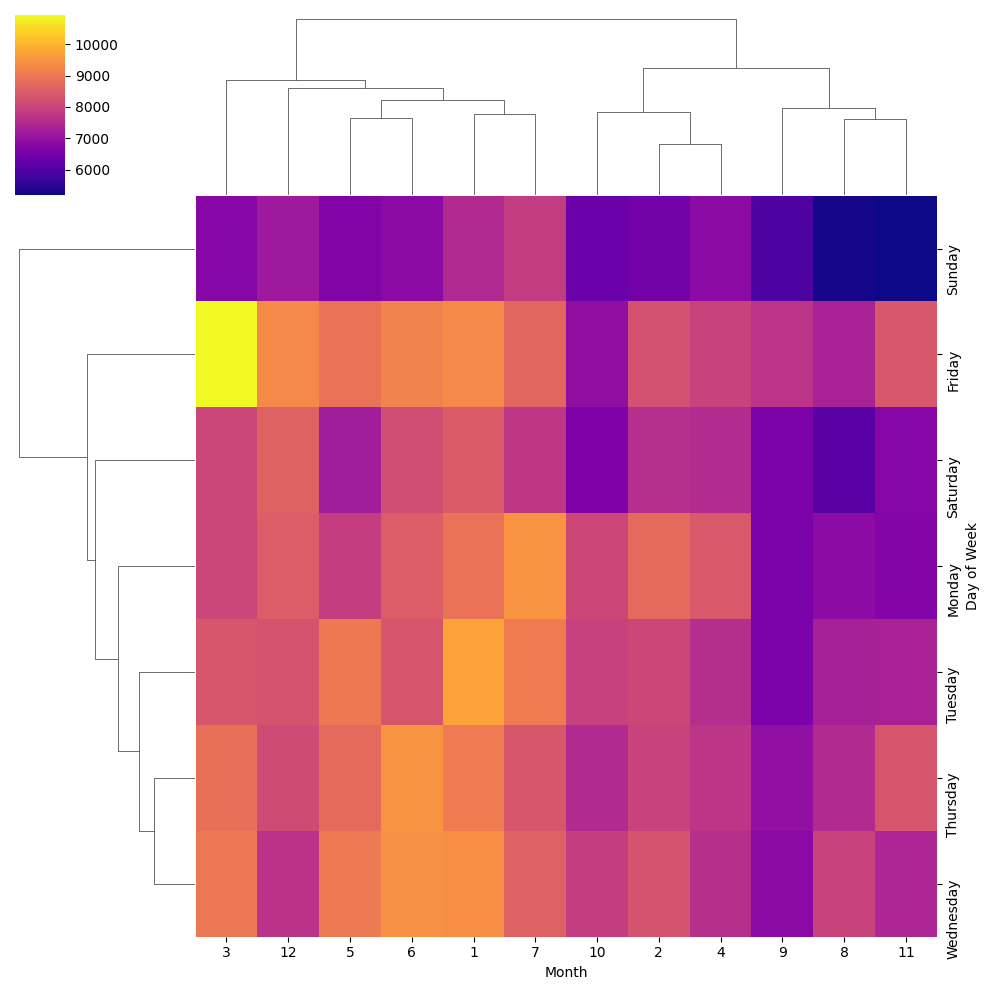

In [ ]:
sns.clustermap(heat_data_month, cmap='plasma')